## Spotify Analysis - Popularity

In [206]:
with open('./share/common.py') as fin:
   exec(fin.read())

with open('./share/matplotlibconf.py') as fin:
    exec(fin.read())

## Read Data from dataset

In [207]:
df = pd.read_csv('./data/SpotifyFeatures.csv')

In [208]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,...,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,...,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad El...,0BjC1NfoEOOusryehmNudP,1,0.246,...,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Ton...,0CoSDzoNIKCRs124s9uTVy,3,0.952,...,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Co...,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,...,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,...,-21.150,Major,0.0456,140.576,4/4,0.390


In [209]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [210]:
df.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [211]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

### Two "Children's Music", merge them to one

In [212]:
df.loc[df['genre'] == "Children’s Music", 'genre'] = "Children's Music"

In [213]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

## Check any null data

In [214]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Distribution of popularity

Text(0.5, 1.0, 'Popularity Dist.')

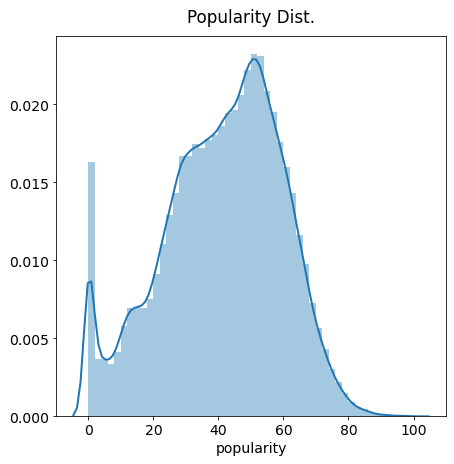

In [215]:
sns.distplot(df['popularity']).set_title('Popularity Dist.')

In [216]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


## Test correlation between popularity and other features.  
### following categories can be considered as features.  
### acouticness, danceability, engery, instrumentalness, liveness, loudness, speechiness, genre

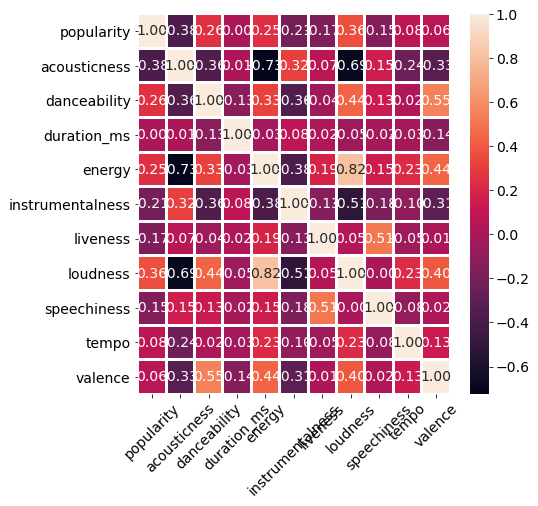

In [217]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidth=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

### 'dureation_ms', 'tempo', 'valence' have low correation with 'popularity'.  eliminate them from features.

## Popularity (1~100) --> Three categories, 0: low, 1: mid, 2: high

In [218]:
df.loc[(df['popularity'] < 34), 'popularity' ] = 0
df.loc[(df['popularity'] >= 34) & (df['popularity'] < 52 ), 'popularity' ] = 1
df.loc[(df['popularity'] >= 52) , 'popularity' ] = 2

In [219]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,...,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,...,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad El...,0BjC1NfoEOOusryehmNudP,0,0.246,...,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Ton...,0CoSDzoNIKCRs124s9uTVy,0,0.952,...,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Co...,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,...,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.950,...,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0.5, 1.0, 'Popularity Dist.')

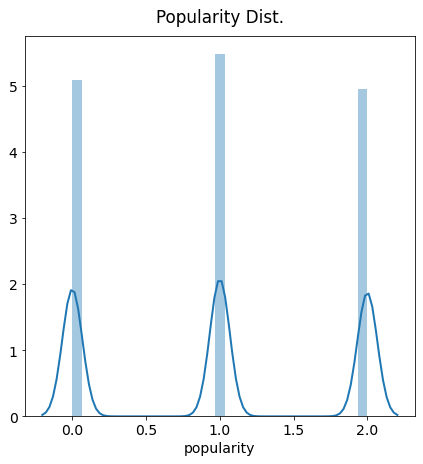

In [220]:
sns.distplot(df['popularity']).set_title('Popularity Dist.')

In [221]:
#df['time_signature'].unique()

In [223]:
df = pd.get_dummies(df, columns=['key', 'time_signature', 'mode', 'genre'], prefix=['key', 'time_sig', 'mode', 'genre'])

In [224]:
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,...,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,...,0,0,0,0,0,0
1,Martin & les fées,Perdu d'avance (par Gad El...,0BjC1NfoEOOusryehmNudP,0,0.246,0.590,...,0,0,0,0,0,0
2,Joseph Williams,Don't Let Me Be Lonely Ton...,0CoSDzoNIKCRs124s9uTVy,0,0.952,0.663,...,0,0,0,0,0,0
3,Henri Salvador,Dis-moi Monsieur Gordon Co...,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,...,0,0,0,0,0,0
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.950,0.331,...,0,0,0,0,0,0


In [225]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'time_sig_0/4', 'time_sig_1/4',
       'time_sig_3/4', 'time_sig_4/4', 'time_sig_5/4', 'mode_Major',
       'mode_Minor', 'genre_A Capella', 'genre_Alternative', 'genre_Anime',
       'genre_Blues', 'genre_Children's Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World'],
      dtype='object')

In [226]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_sig_0/4,time_sig_1/4,...,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
popularity,1.000000,-0.331753,0.260156,-0.020337,0.201079,-0.231710,-0.167909,0.326563,-0.145642,0.072896,0.066534,-0.014794,-0.006959,0.031522,-0.011267,0.040742,-0.019608,-0.023330,-0.008037,-0.013775,0.024175,-0.023277,0.027242,0.000064,-0.067422,...,0.097180,-0.202677,-0.110663,0.015468,-0.137129,-0.231675,0.061469,0.178997,-0.061591,0.094853,0.202050,0.163490,-0.009119,-0.205530,-0.228848,0.255435,0.119887,0.228981,-0.095374,-0.067596,0.230129,-0.167651,0.066327,-0.124164,-0.100814
acousticness,-0.331753,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,-0.006388,0.023361,-0.059981,0.020349,-0.056468,0.009825,0.078559,0.007341,0.043602,-0.024715,0.005195,-0.017831,0.004814,0.106379,...,-0.118364,-0.046028,-0.023052,-0.035533,0.286995,0.249308,-0.054535,-0.119809,-0.143651,0.054423,-0.110609,-0.021768,0.075956,0.172649,0.312192,-0.083061,-0.045402,-0.114853,-0.101959,-0.084240,-0.098835,-0.150875,-0.004479,0.204438,0.014087
danceability,0.260156,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.012897,0.019228,0.037650,-0.022012,0.065773,-0.042175,-0.049416,-0.030208,-0.012620,0.030244,-0.012801,0.024953,-0.004150,-0.082855,...,-0.013674,-0.088577,-0.028277,0.062331,-0.272376,0.005246,0.024022,0.089007,0.071952,-0.029774,0.180707,0.013878,0.034646,-0.063412,-0.272897,0.094844,0.094790,0.156455,0.154503,0.190347,-0.017639,-0.029570,0.068732,-0.323495,-0.120689
duration_ms,-0.020337,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,0.003279,0.000907,0.003555,-0.003701,-0.006726,0.003275,-0.003438,0.009048,0.002876,0.000740,-0.002704,-0.007425,0.000433,-0.028453,...,-0.003220,-0.008712,0.028385,-0.077571,0.128710,0.000320,-0.029570,-0.014677,0.058701,0.001172,-0.025965,-0.019076,0.052771,-0.038715,0.038820,-0.024585,-0.015801,-0.026092,0.007290,-0.005181,0.003221,-0.072945,-0.000692,-0.074324,0.136005
energy,0.201079,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,0.008484,-0.016673,0.053585,-0.037985,0.053516,-0.012364,-0.059750,0.000762,-0.039171,0.042044,-0.014643,0.012791,-0.006009,-0.078527,...,0.108626,0.071600,0.026844,0.021971,-0.303571,0.083140,0.048785,0.095084,0.130926,-0.061349,0.055987,0.007884,-0.076631,-0.141605,-0.293206,0.055442,-0.005106,0.061378,0.048670,0.134847,0.087148,0.184875,-0.029424,-0.276132,-0.049380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
genre_Rock,0.230129,-0.098835,-0.017639,0.003221,0.087148,-0.063925,-0.028796,0.077566,-0.073678,0.032719,0.048717,0.013171,-0.014402,0.000611,0.005714,-0.015279,0.014265,-0.006124,0.013800,-0.008641,-0.001818,0.002605,-0.010412,-0.001194,-0.013546,...,-0.041473,-0.040705,-0.040910,-0.053001,-0.041457,-0.042438,-0.040056,-0.040145,-0.041738,-0.041557,-0.041548,-0.042122,-0.041886,-0.037949,-0.039125,-0.041759,-0.040837,-0.041401,-0.040312,-0.040683,1.000000,-0.040558,-0.041066,-0.042358,-0.041082
genre_Ska,-0.167651,-0.150875,-0.029570,-0.072945,0.184875,-0.060232,0.028583,0.112766,-0.033922,0.075785,0.152013,0.030610,-0.019334,0.005386,0.016190,-0.020646,0.015613,-0.020052,0.008439,-0.019590,-0.021002,0.020077,-0.015368,-0.001167,-0.015228,...,-0.040537,-0.039786,-0.039987,

### 'time_signature' and 'genre' should be in feature.  'mode' and 'key' can be removed as it has very low correation with 'popularity' 

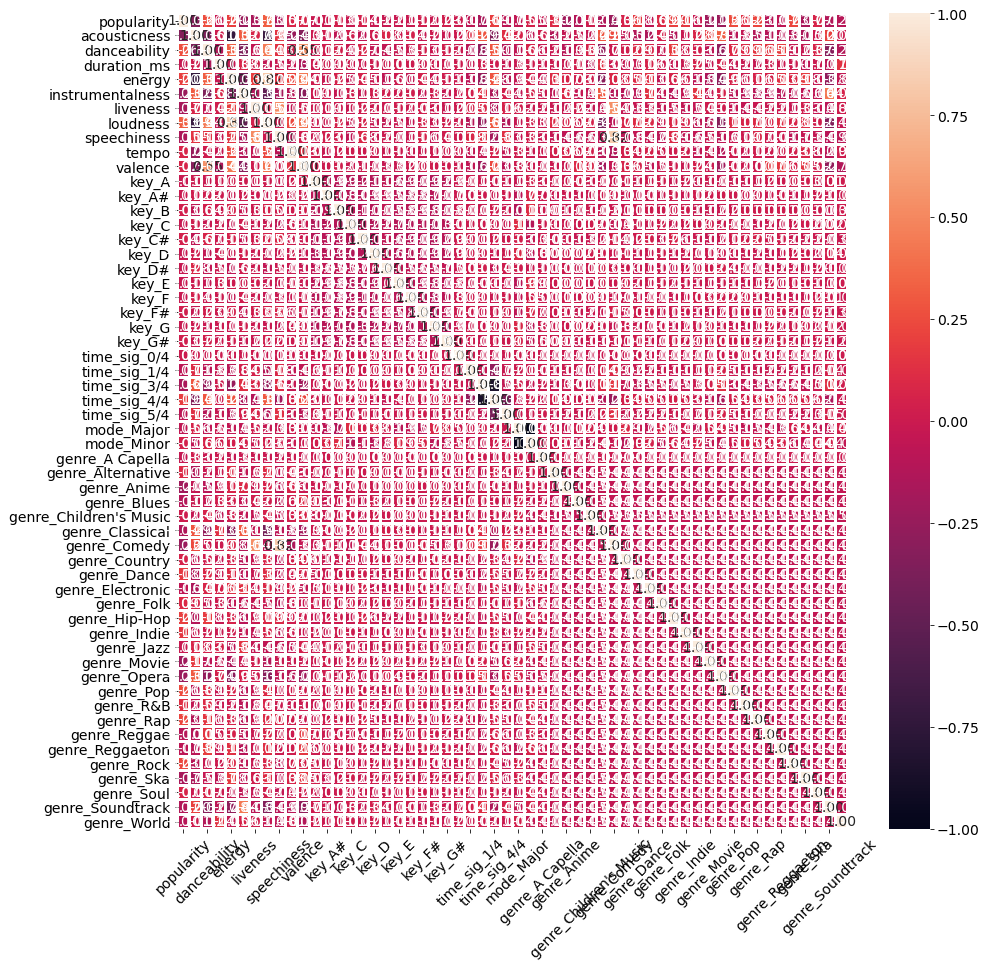

In [227]:
rcParams['figure.figsize'] = (15, 15)
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidth=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import joblib


In [257]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'time_sig_0/4', 'time_sig_1/4',
       'time_sig_3/4', 'time_sig_4/4', 'time_sig_5/4', 'mode_Major',
       'mode_Minor', 'genre_A Capella', 'genre_Alternative', 'genre_Anime',
       'genre_Blues', 'genre_Children's Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World'],
      dtype='object')

In [258]:
features = ['popularity',
       'acousticness', 'danceability','energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 
       "genre_A Capella", 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       "genre_Children's Music", 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World']

In [259]:
model_df = df[features]

In [260]:
model_df.reset_index(drop=True, inplace=True)

In [261]:
model_df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,0,0.611,0.389,0.910,0.000,0.3460,-1.828,0.0525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.246,0.590,0.737,0.000,0.1510,-5.559,0.0868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.952,0.663,0.131,0.000,0.1030,-13.879,0.0362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.703,0.240,0.326,0.000,0.0985,-12.178,0.0395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.950,0.331,0.225,0.123,0.2020,-21.150,0.0456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [262]:
# sns.countplot(x='popularity', data=model_df)

In [263]:
X = model_df.drop('popularity', axis=1).values
y = model_df['popularity']

In [264]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [265]:
label_encoder.classes_

array([0, 1, 2], dtype=int64)

In [266]:
y = to_categorical(encoded_y)


In [267]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99)

X_train_orig = X_train
X_test_orig = X_test

In [269]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
print(X_train.shape, y_train.shape)

(209452, 33) (209452, 3)


In [271]:
model = Sequential()
model.add(Dense(units=124, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=124, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=124, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [272]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [273]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=600, callbacks=[early_stop], verbose=1)

Epoch 1/600
1637/1637 [==============================] - 4s 2ms/step - loss: 0.6645 - accuracy: 0.6831 - val_loss: 0.6266 - val_accuracy: 0.6987
Epoch 2/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6417 - accuracy: 0.6907 - val_loss: 0.6243 - val_accuracy: 0.6987
Epoch 3/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6387 - accuracy: 0.6926 - val_loss: 0.6233 - val_accuracy: 0.6981
Epoch 4/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6371 - accuracy: 0.6928 - val_loss: 0.6224 - val_accuracy: 0.6996
Epoch 5/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6362 - accuracy: 0.6945 - val_loss: 0.6220 - val_accuracy: 0.6992
Epoch 6/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6353 - accuracy: 0.6938 - val_loss: 0.6236 - val_accuracy: 0.6991
Epoch 7/600
1637/1637 [==============================] - 3s 2ms/step - loss: 0.6348 - accuracy: 0.6943 - val_loss: 0.6223 - val_ac

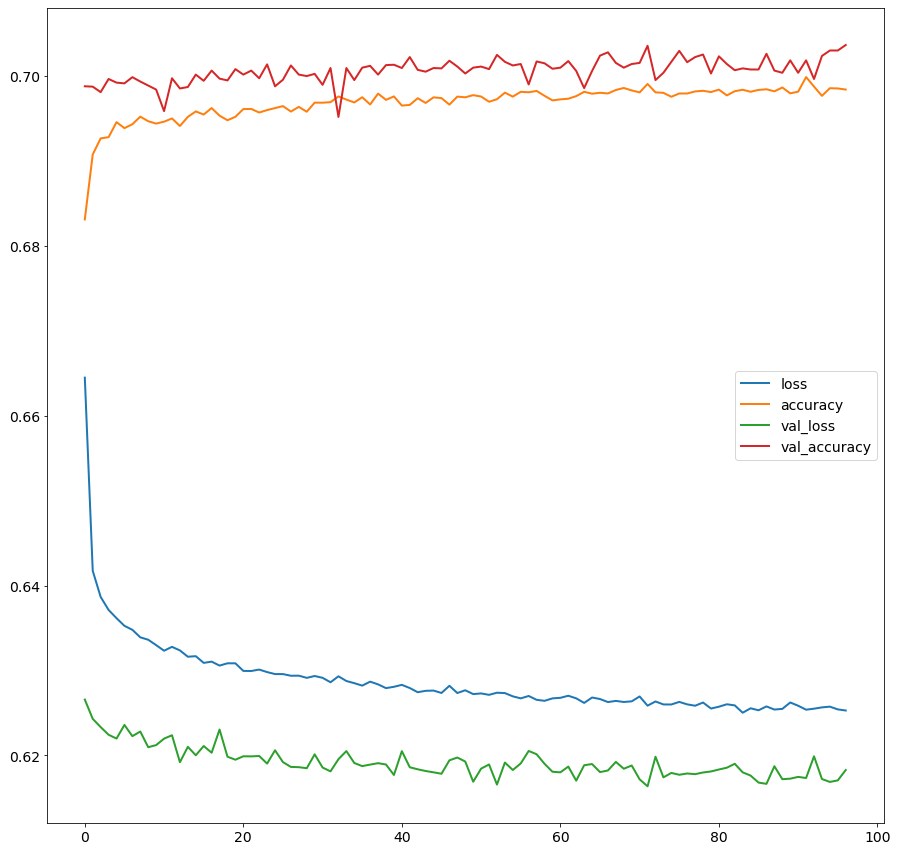

In [274]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [275]:
model.evaluate(X_test, y_test)


728/728 [==============================] - 0s 494us/step - loss: 0.6183 - accuracy: 0.7036


[0.6182864904403687, 0.703605055809021]

In [276]:
predictions = model.predict_classes(X_test)


In [277]:
confusion_matrix(np.argmax(y_test, axis=1), predictions )


array([[6395, 1211,  114],
       [2082, 4709, 1453],
       [ 281, 1757, 5271]], dtype=int64)

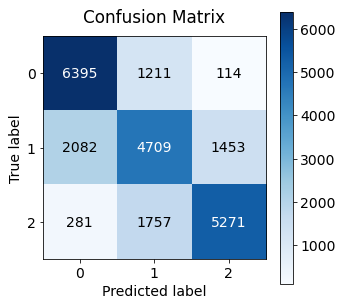

In [278]:
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), predictions, figsize=(5,5))

In [279]:
print(classification_report(np.argmax(y_test, axis=1), predictions))

precision    recall  f1-score   support

           0       0.73      0.83      0.78      7720
           1       0.61      0.57      0.59      8244
           2       0.77      0.72      0.75      7309

    accuracy                           0.70     23273
   macro avg       0.70      0.71      0.70     23273
weighted avg       0.70      0.70      0.70     23273



In [280]:
# save model
model_filename = './models/ann_pop_weight.h5'
model.save(model_filename)

In [281]:
scaler_filename = './models/ann_scaler.pkl'
joblib.dump(scaler, scaler_filename)

['./models/ann_scaler.pkl']

In [283]:
from tensorflow.keras.models import load_model
### retreive model and weight
saved_model =  load_model('./models/ann_pop_weight.h5')

In [284]:
saved_scaler = joblib.load( './models/ann_scaler.pkl')

In [285]:
X_test = saved_scaler.transform(X_test_orig)

In [286]:
saved_model.evaluate(X_test, y_test)

728/728 [==============================] - 0s 481us/step - loss: 0.6183 - accuracy: 0.7036


[0.6182864904403687, 0.703605055809021]

In [288]:
X_test_orig[0]

array([ 7.23e-01,  7.36e-01,  3.18e-01,  1.47e-04,  1.06e-01, -8.27e+00,
        2.62e-02,  0.00e+00,  1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00])

In [303]:
X_test[:1]

array([[7.25903614e-01, 7.28569896e-01, 3.18304466e-01, 1.47147147e-04,
        9.72706068e-02, 7.86231562e-01, 4.23370025e-03, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [309]:
predict = saved_model.predict(X_test[1:2])

In [314]:
predict[0][1]

0.08820285

In [315]:
input = np.array([[7.25903614e-01, 7.28569896e-01, 3.18304466e-01, 1.47147147e-04,
        9.72706068e-02, 7.86231562e-01, 4.23370025e-03, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [316]:
predict = saved_model.predict(input)
print(predict)

[[0.0032113  0.60146964 0.39531907]]
